# Amazon Review Classification

In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import resample,shuffle
import re

In [4]:

from google.colab import drive

In [5]:

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

df=pd.read_csv('/content/drive/MyDrive/amazon (1).csv')

In [7]:
df = df[['overall','reviewText']]

In [8]:
df.head()

overall                                         reviewText
0        4                                         No issues.
1        5  Purchased this for my device, it worked as adv...
2        4  it works as expected. I should have sprung for...
3        5  This think has worked out great.Had a diff. br...
4        5  Bought it with Retail Packaging, arrived legit...

In [9]:
df.isnull().sum()

overall       0
reviewText    1
dtype: int64

In [9]:
df = df.dropna()

In [11]:
df.isnull().sum()

overall       0
reviewText    0
dtype: int64

In [10]:
conditions = [(df['overall']>=4),(df['overall']<=3)]

values =["Positive","Negative"]

In [11]:
df['label'] = np.select(conditions,values)

In [12]:
df.head()

overall                                         reviewText     label
0        4                                         No issues.  Positive
1        5  Purchased this for my device, it worked as adv...  Positive
2        4  it works as expected. I should have sprung for...  Positive
3        5  This think has worked out great.Had a diff. br...  Positive
4        5  Bought it with Retail Packaging, arrived legit...  Positive

In [13]:
d_major =df[df['label'] == 'Positive']
d_minor =df[df['label'] == 'Negative']

In [14]:
# Data upsampling
d_minor_upsampled = resample(d_minor, replace = True, n_samples = d_major.shape[0],random_state =42)

#concatinate with majority class

df = pd.concat([d_major,d_minor_upsampled])

In [15]:
df.head()

overall                                         reviewText     label
0        4                                         No issues.  Positive
1        5  Purchased this for my device, it worked as adv...  Positive
2        4  it works as expected. I should have sprung for...  Positive
3        5  This think has worked out great.Had a diff. br...  Positive
4        5  Bought it with Retail Packaging, arrived legit...  Positive

In [16]:
def clean_text(text):
  text = re.sub("([\w\.\-\_]+@[\w\.\-\_]+)", "", text)
  text = re.sub("(\d+)", "", text)
  text = re.sub("(\n+)", "", text)
  return text

In [17]:
df["reviewText"] = df['reviewText'].apply(clean_text)

In [18]:
text = ' '.join(df['reviewText'].to_list())
text

'No issues. Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me. it works as expected. I should have sprung for the higher capacity.  I think its made a bit cheesier than the earlier versions; the paint looks not as clean as before This think has worked out great.Had a diff. bran gb card and if went south after  months.This one has held up pretty well since I had my S, now on my Note.*** update //I\'ve had this for a few months and have had ZERO issue\'s since it was transferred from my S to my Note and into a note. This card is reliable and solid!Cheers! Bought it with Retail Packaging, arrived legit, in a orange envelope, english version not asian like the picture shows. arrived quickly, bought a  and  both retail packaging for my htc one sv and Lg Optimus, both cards in working order, probably best price you\'ll get for a nice sd card It\'s mini storage.  It doesn\'t do anything

In [ ]:
type(text)

str

In [ ]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud

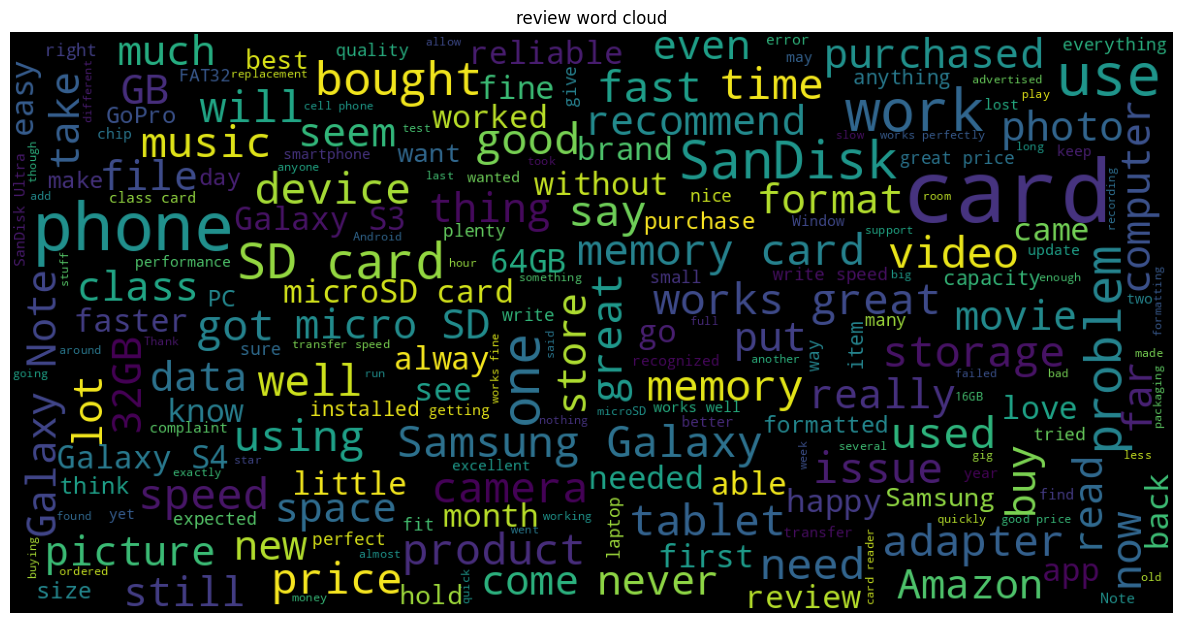

In [ ]:
wordcloud = WordCloud(background_color = "black", max_words = 800, max_font_size =30,colormap= 'viridis',scale=3,random_state=32).generate(text)

fig = plt.figure(1, figsize = (15,10))
plt.axis('off')
plt.title("review word cloud")
plt.imshow(wordcloud)
plt.show()

In [ ]:
import numpy as np
from PIL import Image

In [ ]:
m_mask=np.array(Image.open("/content/fire.jpg"))
m_mask.shape

(512, 512)

3042000

In [ ]:
def trans_format(val):
  if val==0:
    return 255
  else:
    return 0


In [ ]:
m_mask_trans = np.ndarray((m_mask.shape[0], m_mask.shape[1]), np.int32)

In [ ]:
from typing_extensions import LiteralString
for i in range(len(m_mask)):
   m_mask_trans[i]=list(map(trans_format,m_mask[i]))

(1521000, 2)

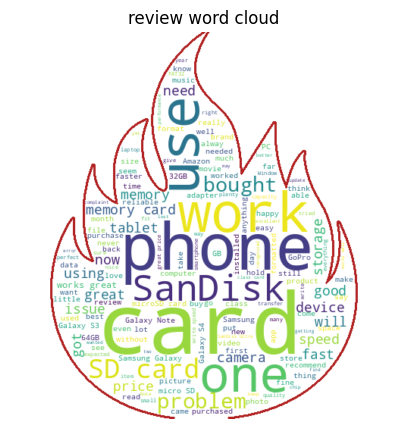

In [ ]:
wc = WordCloud(background_color="white", max_words=1000, mask=m_mask_trans,
               contour_width=3, contour_color='firebrick')
wc.generate(text)

fig = plt.figure(1, figsize = (5,8))
plt.axis('off')
plt.title("review word cloud")
plt.imshow(wc,interpolation='bilinear')
plt.show()

In [19]:

import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
# converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
  filtered_sentence = []

  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  return filtered_sentence


In [21]:
df['reviewText'] =df['reviewText'].apply(remove_stopwords)

In [22]:
def tokenizing(review):
  tokens = nltk.word_tokenize(review)
  return tokens

In [23]:
def stemming(text):

  ps = PorterStemmer()
  filsent =[]
  for w in text:
     filsent.append(ps.stem(w))
  return filsent

In [24]:
df['reviewText'] =df['reviewText'].apply(stemming)


In [25]:
df['reviewText']

0                                           [no, issu, .]
1       [purchas, devic, ,, work, advertis, ., you, ne...
2       [work, expect, ., i, sprung, higher, capac, .,...
3       [thi, think, work, great.had, diff, ., bran, g...
4       [bought, retail, packag, ,, arriv, legit, ,, o...
                              ...                        
4581    [i, bought, galaxi, note, ., ,, function, prop...
4162    [got, sdsdqu-g-affp-a, decemb, ,, ,, die, may,...
217     [i, bought, card, strength, gb, xdsc, sandisk,...
3391    [i, purhcas, card, hero, cam, ., it, work, las...
1709    [thi, card, exactli, ., class-, perform, fair,...
Name: reviewText, Length: 8896, dtype: object

In [26]:
from gensim.models.word2vec import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [27]:
review = []
for i in df['reviewText']:
    review.append(i)


In [32]:
review[:2]

[['no', 'issu', '.'],
 ['purchas',
  'devic',
  ',',
  'work',
  'advertis',
  '.',
  'you',
  'never',
  'much',
  'phone',
  'memori',
  ',',
  'sinc',
  'i',
  'download',
  'lot',
  'stuff',
  'brainer',
  '.']]

In [28]:
word2vec_model = Word2Vec(review, vector_size=500, window=3, min_count=1, workers=16)


In [36]:
print(word2vec_model )

Word2Vec<vocab=7471, vector_size=500, alpha=0.025>


In [29]:
token = Tokenizer(7471)
token.fit_on_texts(df['reviewText'])
text = token.texts_to_sequences(df['reviewText'])
text = pad_sequences(text, 75)
print(text[:2])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0  155   43    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
    64   42    3    5  268    1  263   88  110    6   16    3  114    2
   308   94  368 1447    1]]


In [30]:
from sklearn import preprocessing
from keras.utils import to_categorical

In [31]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['label'])
y = to_categorical(y)
y[:2]

array([[0., 1.],
       [0., 1.]], dtype=float32)

In [32]:
from sklearn.model_selection  import train_test_split


In [33]:
x_train, x_test, y_train, y_test = train_test_split(np.array(text), y, test_size=0.2, stratify=y)

In [34]:
from tensorflow.keras.layers import Embedding
def gensim_to_keras_embedding(model, train_embeddings=False):
  keyed_vectors = model.wv  # structure holding the result of training
  weights = keyed_vectors.vectors  # vectors themselves, a 2D numpy array
  index_to_key = keyed_vectors.index_to_key  # which row in `weights` corresponds to which word?

  layer = Embedding(
      input_dim=weights.shape[0],
      output_dim=weights.shape[1],
      weights=[weights],
      trainable=train_embeddings,
    )
  return layer

In [35]:
wv =gensim_to_keras_embedding(word2vec_model, train_embeddings=False)

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, GlobalMaxPool1D, Embedding, Activation
from keras.layers import Conv2D

In [37]:
keras_model = Sequential()
keras_model.add(wv)
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(50, 3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(50, 3, activation='relu', padding='same', strides=1))
keras_model.add(MaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(100, 3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(100, 3, activation='relu', padding='same', strides=1))
keras_model.add(MaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(200, 3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(200, 3, activation='relu', padding='same', strides=1))
keras_model.add(GlobalMaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Dense(200))
keras_model.add(Activation('relu'))
keras_model.add(Dropout(0.2))
keras_model.add(Dense(2))
keras_model.add(Activation('softmax'))
keras_model.compile(loss='mse', metrics=['acc'], optimizer='adam')
keras_model.fit(x_train, y_train, batch_size=16, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
445/445 [==============================] - 26s 52ms/step - loss: 0.1825 - acc: 0.7303 - val_loss: 0.1598 - val_acc: 0.7669
Epoch 2/3
445/445 [==============================] - 23s 51ms/step - loss: 0.1251 - acc: 0.8368 - val_loss: 0.1024 - val_acc: 0.8736
Epoch 3/3
445/445 [==============================] - 27s 60ms/step - loss: 0.0959 - acc: 0.8808 - val_loss: 0.0919 - val_acc: 0.8860


In [38]:
loss, accuracy = keras_model.evaluate(x_test,y_test)

56/56 [==============================] - 1s 21ms/step - loss: 0.0919 - acc: 0.8860


In [39]:
print(x_train.shape, y_train.shape)

(7116, 75) (7116, 2)


In [40]:
history = keras_model.fit(x_train, y_train, epochs=12, batch_size=100, validation_data=(x_test,y_test))

Epoch 1/12
72/72 [==============================] - 19s 267ms/step - loss: 0.0650 - acc: 0.9200 - val_loss: 0.0562 - val_acc: 0.9354
Epoch 2/12
72/72 [==============================] - 19s 259ms/step - loss: 0.0542 - acc: 0.9352 - val_loss: 0.0502 - val_acc: 0.9433
Epoch 3/12
72/72 [==============================] - 24s 334ms/step - loss: 0.0472 - acc: 0.9466 - val_loss: 0.0466 - val_acc: 0.9489
Epoch 4/12
72/72 [==============================] - 33s 457ms/step - loss: 0.0439 - acc: 0.9490 - val_loss: 0.0454 - val_acc: 0.9472
Epoch 5/12
72/72 [==============================] - 29s 408ms/step - loss: 0.0400 - acc: 0.9540 - val_loss: 0.0405 - val_acc: 0.9545
Epoch 6/12
72/72 [==============================] - 21s 284ms/step - loss: 0.0387 - acc: 0.9556 - val_loss: 0.0460 - val_acc: 0.9466
Epoch 7/12
72/72 [==============================] - 20s 279ms/step - loss: 0.0400 - acc: 0.9536 - val_loss: 0.0448 - val_acc: 0.9455
Epoch 8/12
72/72 [==============================] - 20s 274ms/step - 

In [49]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 500)         3735500   
                                                                 
 dropout (Dropout)           (None, None, 500)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 50)          75050     
                                                                 
 conv1d_1 (Conv1D)           (None, None, 50)          7550      
                                                                 
 max_pooling1d (MaxPooling1  (None, None, 50)          0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, None, 50)          0         
                                                        

In [41]:
import matplotlib.pyplot as plt

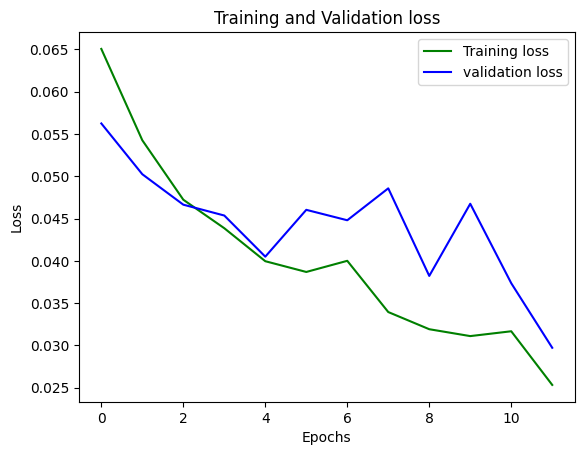

In [42]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,12)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

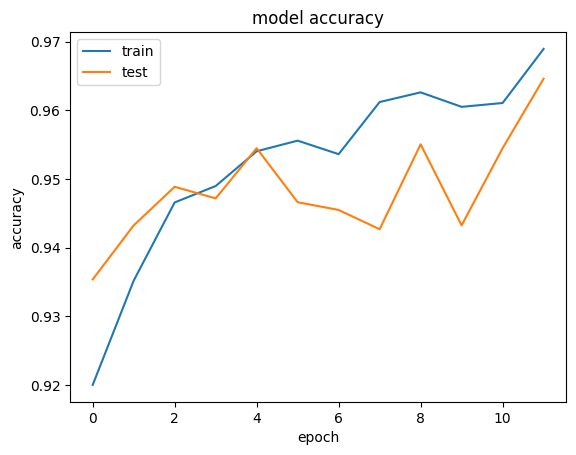

In [46]:
plt.plot(history.history[ 'acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
from keras.layers import LSTM

In [53]:
model = Sequential()
model.add(wv)
model.add(LSTM(100, activation='relu',
               input_shape=(7471, 500)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=5)
model.summary()


Epoch 1/5
223/223 [==============================] - 37s 136ms/step - loss: 0.2563
Epoch 2/5
223/223 [==============================] - 31s 138ms/step - loss: 0.2503
Epoch 3/5
223/223 [==============================] - 33s 147ms/step - loss: 0.2501
Epoch 4/5
223/223 [==============================] - 34s 153ms/step - loss: 0.2500
Epoch 5/5
223/223 [==============================] - 33s 147ms/step - loss: 0.2500
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 500)         3735500   
                                                                 
 lstm_3 (LSTM)               (None, 100)               240400    
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3976001 (15.17 MB)
Tr